# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [6]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [7]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

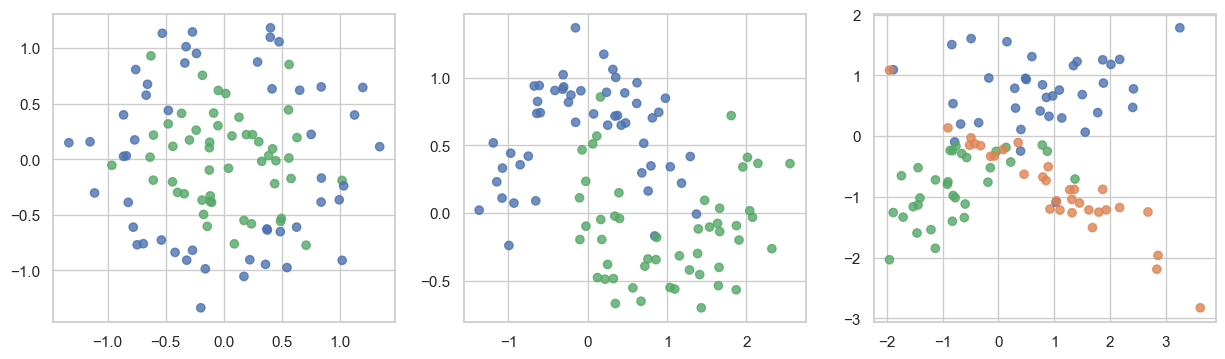

In [8]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [10]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

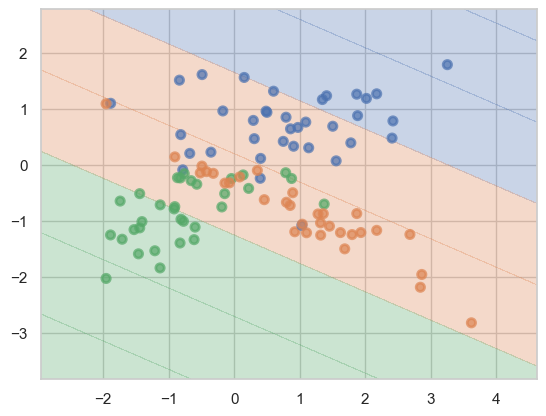

In [11]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [12]:
X_0, y_0 = datasets[0]
X_1, y_1 = datasets[1]
X_2, y_2 = datasets[2]

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
    X_0, y_0, test_size=0.25, random_state=777, stratify=y_0
)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, y_1, test_size=0.25, random_state=777, stratify=y_1
)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.25, random_state=777, stratify=y_2
)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

clf_classifier_0 = DecisionTreeClassifier(random_state =42)
clf_classifier_1 = DecisionTreeClassifier(random_state =42)
clf_classifier_2 = DecisionTreeClassifier(random_state =42)

clf_classifier_0.fit(X_train_0, y_train_0)
clf_classifier_1.fit(X_train_1, y_train_1)
clf_classifier_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score

def compute_accuracy(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    return train_accuracy, test_accuracy

train_acc_0, test_acc_0 = compute_accuracy(clf_classifier_0, X_train_0, y_train_0, X_test_0, y_test_0)
train_acc_1, test_acc_1 = compute_accuracy(clf_classifier_1, X_train_1, y_train_1, X_test_1, y_test_1)
train_acc_2, test_acc_2 = compute_accuracy(clf_classifier_2, X_train_2, y_train_2, X_test_2, y_test_2)

print(f"train accuracy_0: {train_acc_0:.4f}, test accuracy_0: {test_acc_0:.4f}")

print(f"train accuracy_1: {train_acc_1:.4f}, test accuracy_1: {test_acc_1:.4f}")

print(f"train accuracy_2: {train_acc_2:.4f}, test accuracy_2: {test_acc_2:.4f}")

train accuracy_0: 1.0000, test accuracy_0: 0.9200
train accuracy_1: 1.0000, test accuracy_1: 0.7600
train accuracy_2: 1.0000, test accuracy_2: 0.8400


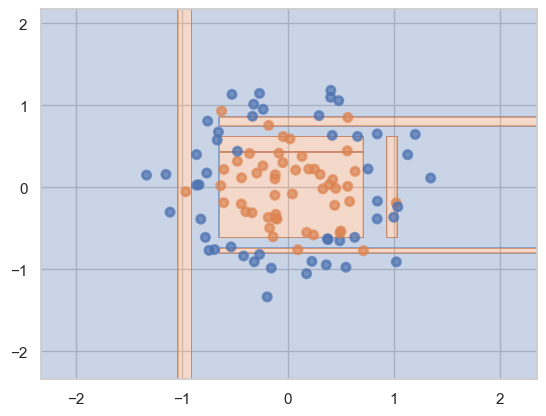

In [15]:
plot_surface(clf_classifier_0, X_0, y_0)

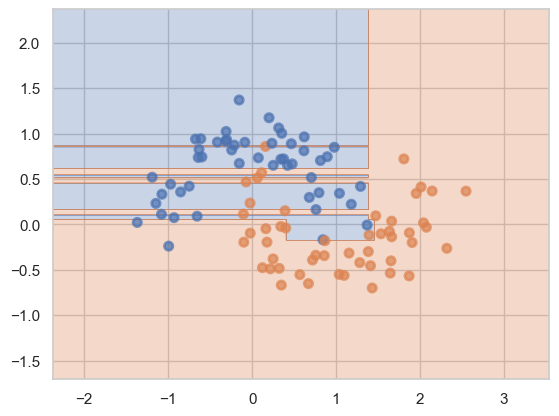

In [16]:
plot_surface(clf_classifier_1, X_1, y_1)

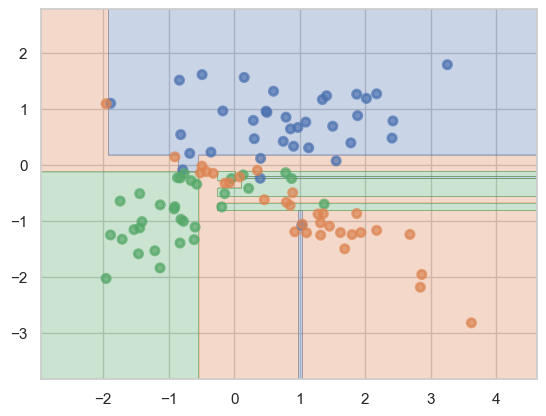

In [17]:
plot_surface(clf_classifier_2, X_2, y_2)

__Ответ:__ разумеется переобучились в щи, на обучающей выборке нет ошибок, на тестовой второй и третий деревья под вопросом еще. Первое дерево никуда не годится

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

best_params = []
for i, (X_tr, y_tr) in enumerate([(X_train_0, y_train_0), (X_train_1, y_train_1), (X_train_2, y_train_2)]):
    grid_search = GridSearchCV(
        DecisionTreeClassifier(random_state=777),
        param_grid,
        cv=10,
        scoring='accuracy'
    )
    grid_search.fit(X_tr, y_tr)
    best_params.append(grid_search.best_params_)
    
    print(f"Датасет{i}:")
    print("best параметры:", grid_search.best_params_)
    print("best accuracy:", grid_search.best_score_.round(4))

Датасет0:
best параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4}
best accuracy: 0.8554
Датасет1:
best параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
best accuracy: 0.8929
Датасет2:
best параметры: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4}
best accuracy: 0.8


In [21]:
# import numpy as np
# import plotly.graph_objects as go
# from ipywidgets import interact, IntSlider, Dropdown
# from IPython.display import display

# from google.colab import output
# output.enable_custom_widget_manager()

# def make_meshgrid(x, y, h=0.02):
#     x_min, x_max = x.min() - 0.5, x.max() + 0.5
#     y_min, y_max = y.min() - 0.5, y.max() + 0.5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     return xx, yy

# def plot_decision_boundary(dataset_idx=0, max_depth=3, min_samples_leaf=1):
#     datasets = [
#         (X_train_0, y_train_0, clf_classifier_0),
#         (X_train_1, y_train_1, clf_classifier_1),
#         (X_train_2, y_train_2, clf_classifier_2)
#     ]
    
#     X, y, model = datasets[dataset_idx]
#     model.set_params(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
#     model.fit(X, y)
    
#     xx, yy = make_meshgrid(X[:, 0], X[:, 1])
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
#     fig = go.Figure()
#     fig.add_trace(go.Contour(x=xx[0], y=yy[:, 0], z=Z, colorscale='Viridis', opacity=0.5))
#     fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=y, size=8)))
#     fig.update_layout(title=f"Dataset {dataset_idx} | Depth: {max_depth} | Leaf: {min_samples_leaf}")
#     fig.show()

# interact(
#     plot_decision_boundary,
#     dataset_idx=Dropdown(options=[0, 1, 2], description='Dataset:'),
#     max_depth=IntSlider(min=1, max=10, value=3, description='Max Depth:'),
#     min_samples_leaf=IntSlider(min=1, max=10, value=1, description='Min Leaf:')
# )

__Ответ:__ тут не работают виджеты, надо в колабе открывать, все заработает красиво. Получили одинаковые максимальную глубину для каждого датасета, но почему то на втором min_samples_leaf': 1, тогда как у первого и третьего 4. это объяснимо разными наборами данных, например для резделения полумесяцев нужно больше гибкости, тогда как в первом случае важна умеренная сложность (глубина и число объектов в листе). Получили очень даже неплохую точность.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

ес ес, сделал

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [28]:
data_csv = pd.read_csv('students.csv')
data = pd.DataFrame(data_csv)
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [29]:
X = data[["STG", "SCG", "STR", "LPR", "PEG"]]
y = data["UNS"]

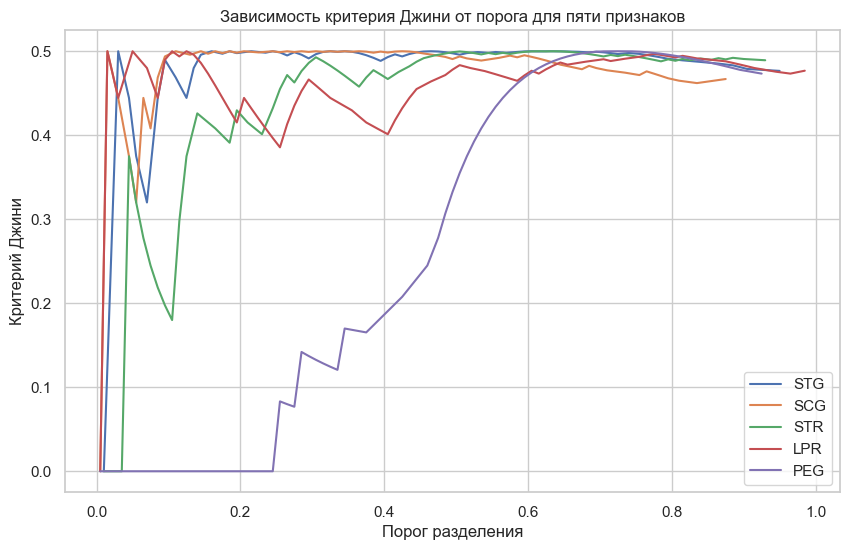

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_gini(feature, target):
    feature = np.array(feature)
    target = np.array(target)

    sorted_idx = np.argsort(feature)
    sorted_feature = feature[sorted_idx]
    sorted_target = target[sorted_idx]
    
    thresholds = (sorted_feature[1:] + sorted_feature[:-1]) / 2
    mask = np.diff(sorted_feature) != 0
    unique_thresh = thresholds[mask]
    
    cumsum = np.cumsum(sorted_target[:-1][mask])
    count_left = np.arange(1, len(unique_thresh) + 1)
    
    p1_left = cumsum / count_left
    gini = 1 - p1_left**2 - (1 - p1_left)**2
    return unique_thresh, gini

plt.figure(figsize=(10,6))
for col in X.columns[:5]:
    thresh, gini = calculate_gini(X[col], y)
    plt.plot(thresh, gini, label=f'{col}')
plt.xlabel("Порог разделения")
plt.ylabel("Критерий Джини")
plt.title("Зависимость критерия Джини от порога для пяти признаков")
plt.legend()
plt.grid(True)

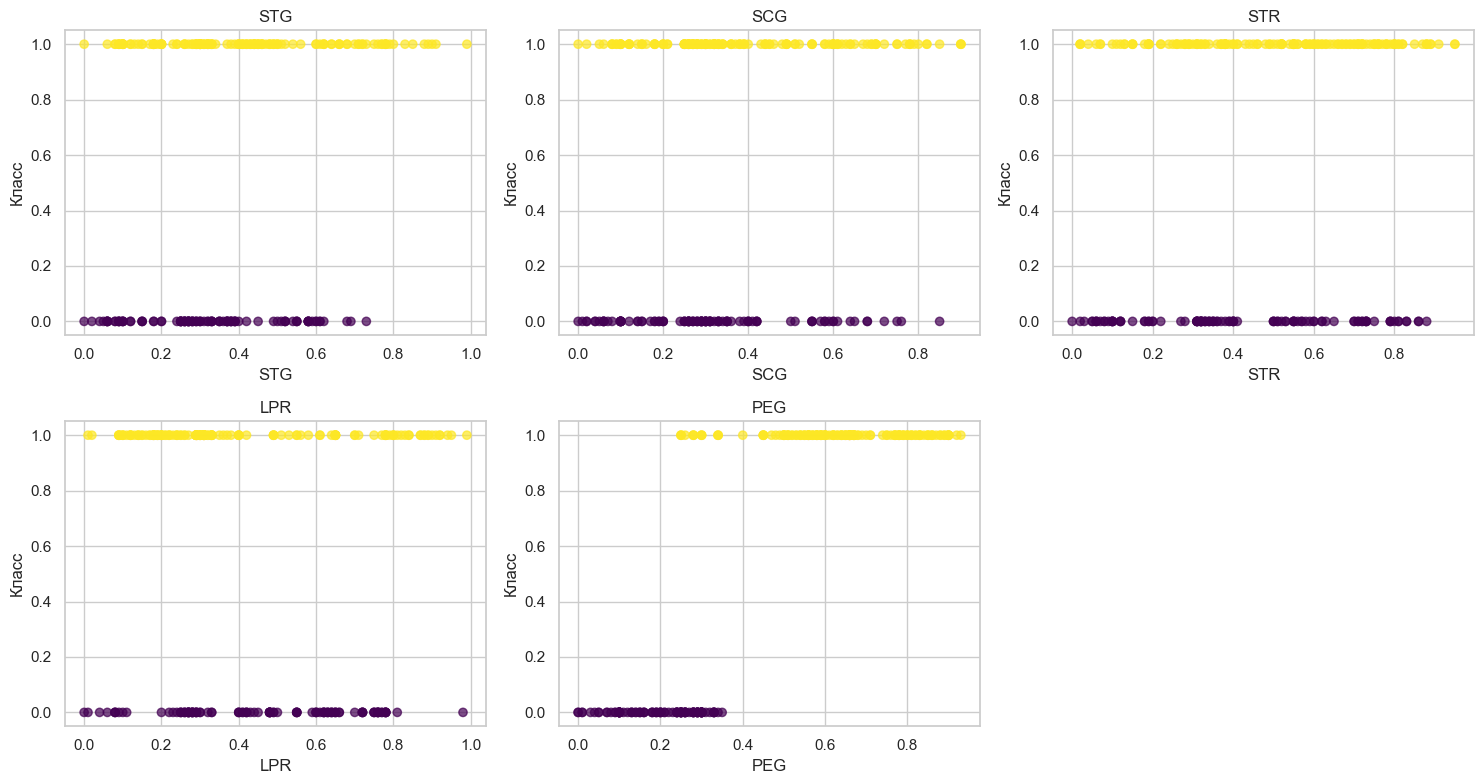

In [31]:
plt.figure(figsize=(15,8))
for i, col in enumerate(X.columns[:5]):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[col], y, c=y, cmap='viridis', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Класс")
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** необходимо выбрать такой признак, при котором критерий джини будет как можно меньше, что будет свидетельствовать о "чистоте" классов. в нашем случае пусть это будет PEG, он явно выделяется. ответ на последний вопрос: я думаю что если кривая будет почти прямой, значит признак вообще фуфло и не дает информации.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [36]:
data = pd.read_csv('agaricus-lepiota.data')
df = pd.DataFrame(data)
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
df_encoded = df.copy()
for col in df_encoded.columns:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from hw5code import DecisionTree

y = df_encoded.iloc[:, 0]
X = df_encoded.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)
X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values

num_features = X_train.shape[1]
feature_types = ["categorical"] * num_features

tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = np.mean(y_pred == y_test)
accuracy

1.0

Внатуре, единица

__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [41]:
data = pd.read_csv('tic-tac-toe-endgame.csv')
df = pd.DataFrame(data)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [42]:
from hw5code import DecisionTree
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2,0
954,1,2,1,2,2,1,2,1,2,0
955,1,2,1,2,1,2,2,1,2,0
956,1,2,1,1,2,2,2,1,2,0


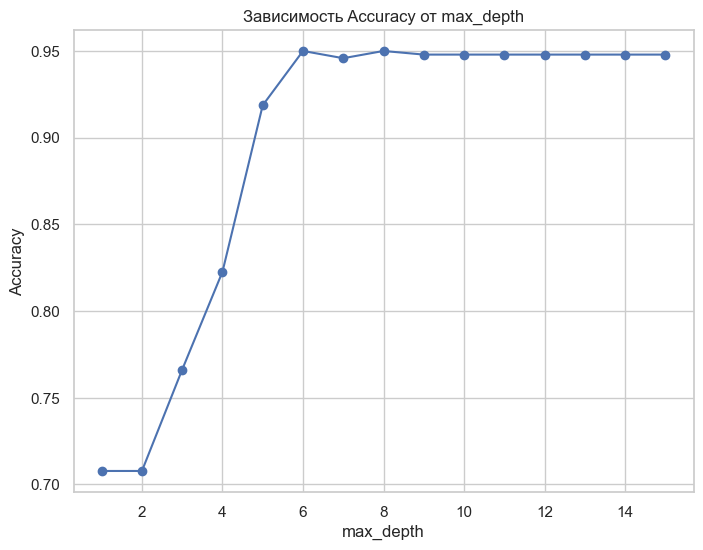

In [43]:
from hw5code import DecisionTree

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values

num_features = X_train.shape[1]
feature_types = ["categorical"] * num_features


max_depth_range = range(1, 16)
accuracies_depth = []

for max_depth in max_depth_range:
    tree = DecisionTree(feature_types=feature_types, max_depth=max_depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_depth.append(acc)

plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, accuracies_depth, marker="o")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Зависимость Accuracy от max_depth")
plt.grid(True)
plt.show()



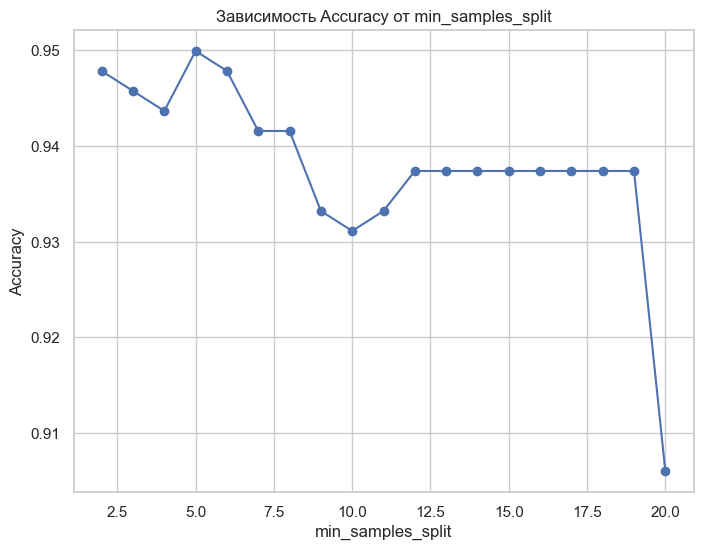

In [44]:
min_samples_split_range = range(2, 21)
accuracies_split = []

for min_samples_split in min_samples_split_range:
    tree = DecisionTree(feature_types=feature_types, min_samples_split=min_samples_split)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_split.append(acc)

plt.figure(figsize=(8, 6))
plt.plot(min_samples_split_range, accuracies_split, marker="o")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Зависимость Accuracy от min_samples_split")
plt.grid(True)
plt.show()

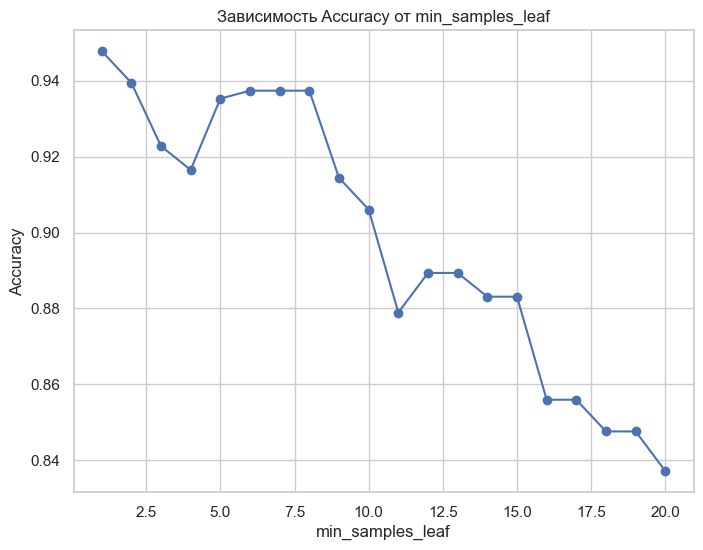

In [45]:
min_samples_leaf_range = range(1, 21)
accuracies_leaf = []

for min_samples_leaf in min_samples_leaf_range:
    tree = DecisionTree(feature_types=feature_types, min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_leaf.append(acc)

plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaf_range, accuracies_leaf, marker="o")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Зависимость Accuracy от min_samples_leaf")
plt.grid(True)
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [48]:
from sklearn.datasets import fetch_california_housing
from hw5code import LinearRegressionTree
housing_data = fetch_california_housing()

housing = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
housing['MedHouseVal'] = housing_data.target

In [49]:
X = housing.drop('MedHouseVal', axis=1).values
y = housing['MedHouseVal'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'n_quantiles': [10, 20, 30]
}

# Создаем модель
model = LinearRegressionTree(feature_types=["real"]*X.shape[1])
best_score = float('inf')
best_params = {}

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for n_quantiles in param_grid['n_quantiles']:
                
                model = LinearRegressionTree(
                    feature_types=["real"]*X.shape[1],
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    n_quantiles=n_quantiles
                )
                model.fit(X_train, y_train)
                
                y_pred = model.predict(X_test)
                score = mean_squared_error(y_test, y_pred)
                
                if score < best_score:
                    best_score = score
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'n_quantiles': n_quantiles
                    }
                    print(f"New best MSE: {best_score:.4f} with params: {best_params}")

print("\nBest parameters found:")
print(best_params)
print(f"Best MSE: {best_score:.4f}")

New best MSE: 0.3887 with params: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5, 'n_quantiles': 10}
New best MSE: 0.3878 with params: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5, 'n_quantiles': 20}
New best MSE: 0.3871 with params: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5, 'n_quantiles': 30}
New best MSE: 0.3523 with params: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'n_quantiles': 10}
New best MSE: 0.3462 with params: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'n_quantiles': 30}
New best MSE: 0.3456 with params: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 15, 'n_quantiles': 30}
New best MSE: 0.3271 with params: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 15, 'n_quantiles': 10}
New best MSE: 0.3155 with params: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 15, 'n_quantiles': 30}

Best parameters found:
{'max_depth': 7, 'min_samples

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])
lr_param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}
lr_grid = GridSearchCV(lr_pipe, lr_param_grid, 
                      scoring='neg_mean_squared_error',
                      cv=5, n_jobs=-1, verbose=1)
lr_grid.fit(X_train, y_train)

best_lr = lr_grid.best_estimator_
y_pred_lr = best_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr

Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.5558915618350111

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

Обучать стандартную модель не стал, у меня ноут лопнет это считать. Но в целом все равно можно сказать что результат очень хороший для данного датасета. как недостаток могу сказать, что явно сложная модель для таких задач, явно, что хорошо настроенная линейная модель будет выдавать примерно такие же резы

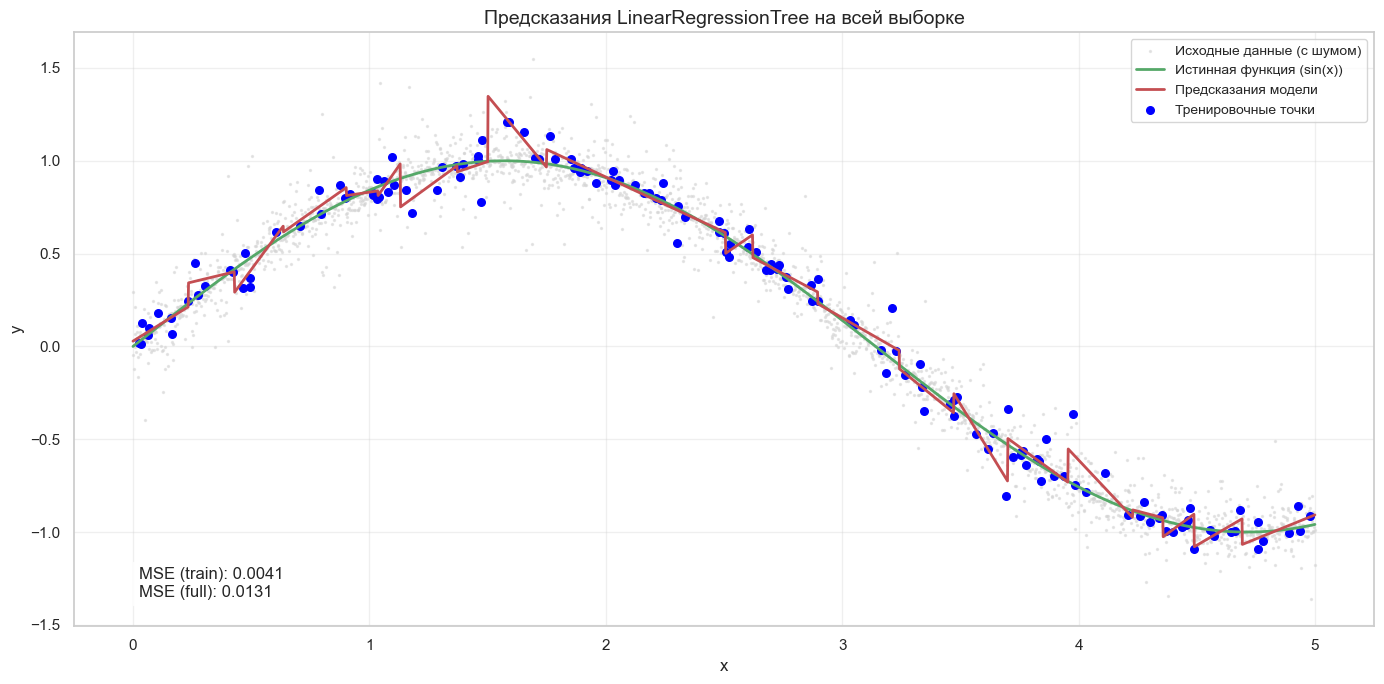

In [99]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))


model = LinearRegressionTree(
    feature_types=["real"],
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    n_quantiles=20
)
model.fit(x_train, y_train)

y_pred_full = model.predict(x)

plt.figure(figsize=(14, 7))
plt.scatter(x, y, s=2, alpha=0.5, label='Исходные данные (с шумом)', color='lightgray')

plt.plot(x, np.sin(x), 'g-', linewidth=2, label='Истинная функция (sin(x))')

plt.plot(x, y_pred_full, 'r-', linewidth=2, label='Предсказания модели')

plt.scatter(x_train, y_train, s=30, color='blue', label='Тренировочные точки')

plt.title('Предсказания LinearRegressionTree на всей выборке', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

mse_train = mean_squared_error(y_train, model.predict(x_train))
mse_full = mean_squared_error(y, y_pred_full)
plt.text(0.05, 0.05, 
         f'MSE (train): {mse_train:.4f}\nMSE (full): {mse_full:.4f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

**Ответ:** сильно переобучена

Вставьте что угодно, описывающее ваши впечатления от этого задания: